In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Training data
train=pd.read_csv("train.csv")
print("There are {} comments".format(len(train)))
train.head()

There are 159571 comments


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
# Test data
test=pd.read_csv("test.csv")
print("There are {} comments".format(len(test)))
test.head()

There are 153164 comments


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
print("Train shape is",train.shape)
print("Test shape is",test.shape)
print("Description of train data set",train.describe())
print("Description of test data set",test.describe())

Train shape is (159571, 8)
Test shape is (153164, 2)
Description of train data set                toxic   severe_toxic        obscene         threat  \
count  159571.000000  159571.000000  159571.000000  159571.000000   
mean        0.095844       0.009996       0.052948       0.002996   
std         0.294379       0.099477       0.223931       0.054650   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              insult  identity_hate  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.

In [5]:
# Checking for null values
print(train.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


AxesSubplot(0.125,0.11;0.62x0.77)


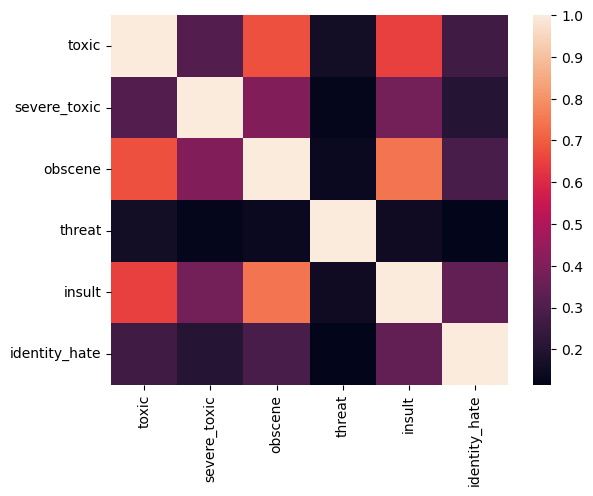

In [6]:
# Checking correlation in the dataset
print(sns.heatmap(train.corr()))
plt.show()

In [7]:
# checking the skewness for the features:
train.skew()

C:\Users\HP\AppData\Local\Temp\ipykernel_12244\3462410898.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


toxic             2.745854
severe_toxic      9.851722
obscene           3.992817
threat           18.189001
insult            4.160540
identity_hate    10.515923
dtype: float64

In [8]:
columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df= train.groupby(columns)\
                    .size()\
                    .sort_values(ascending=False)\
                    .reset_index()\
                    .rename(columns={0: 'count'})
df.head(n=10)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,count
0,0,0,0,0,0,0,143346
1,1,0,0,0,0,0,5666
2,1,0,1,0,1,0,3800
3,1,0,1,0,0,0,1758
4,1,0,0,0,1,0,1215
5,1,1,1,0,1,0,989
6,1,0,1,0,1,1,618
7,0,0,1,0,0,0,317
8,0,0,0,0,1,0,301
9,1,1,1,0,1,1,265


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Type ')

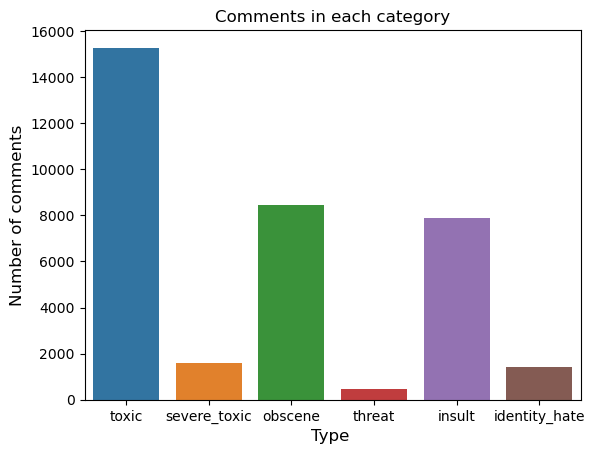

In [9]:
x=train.iloc[:,2:].sum()
axis= sns.barplot(x.index, x.values)
plt.title("Comments in each category")
plt.ylabel('Number of comments', fontsize=12)
plt.xlabel('Type ', fontsize=12)

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


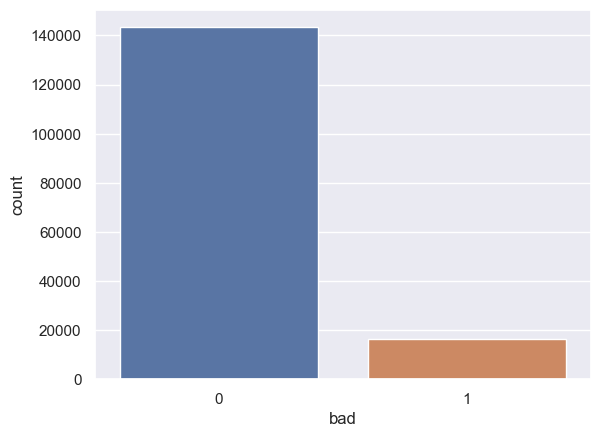

In [10]:
# Wheter a row has any of the 6 types of toxicity?
# Prints the count of unique value in 'bad' column

cols_target = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
target_data = train[cols_target]

train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

# plot
sns.set()
sns.countplot(x="bad" , data = train)
plt.show()

Max length: 5000, Min length: 5, Average Length :  394.13883475067524


<AxesSubplot:>

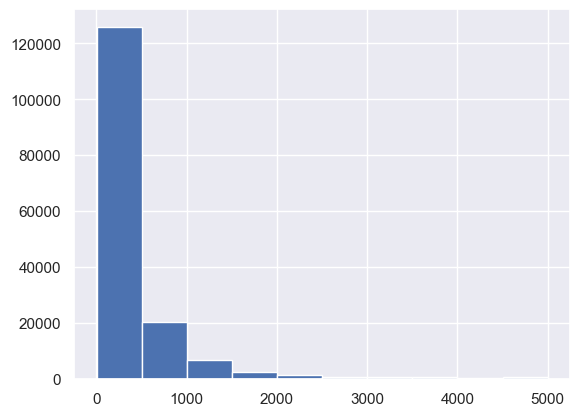

In [11]:
# Comment's length distribution
train['len']= train['comment_text'].str.len()
print('Max length: {}, Min length: {}, Average Length :  {}'.format(max(train['len']),min(train['len']),train['len'].mean()))
train['len'].hist()

In [12]:
# Counting unique words
count_word = train["comment_text"].apply(lambda x: len(str(x).split()))
#Unique word count
count_unique_word = train["comment_text"].apply(lambda x: len(set(str(x).split())))
unique_percent = count_unique_word*100/count_word
unique_percent

0          95.348837
1         100.000000
2          92.857143
3          72.566372
4         100.000000
             ...    
159566     93.617021
159567    100.000000
159568    100.000000
159569     92.000000
159570     88.888889
Name: comment_text, Length: 159571, dtype: float64

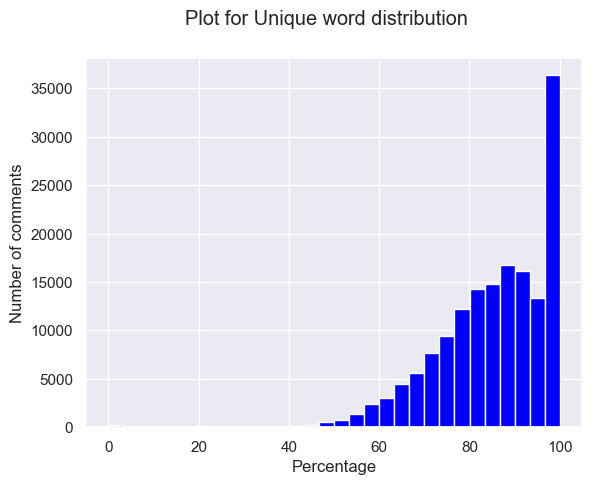

In [13]:
unique_percent.hist(bins=30,color='blue')
plt.suptitle("Plot for Unique word distribution")
plt.xlabel("Percentage")
plt.ylabel("Number of comments")
plt.show()

In [14]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [15]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
# Convert all messages to lower case
train['comment_text'] = train['comment_text'].str.lower()

# Replace email addresses with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

C:\Users\HP\AppData\Local\Temp\ipykernel_12244\2392113331.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
C:\Users\HP\AppData\Local\Temp\ipykernel_12244\2392113331.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
C:\Users\HP\AppData\Local\Temp\ipykernel_12244\2392113331.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
C:\Users\HP\AppData\Local\Temp\ipykernel_12244\2392113331.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d

In [17]:
train['clean_length'] = train.comment_text.str.len()
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,bad,len,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,180
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,0,112,111
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,0,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,0,67,47


In [18]:
# Length after cleaning
print ('Original Length', train.len.sum())
print ('Clean Length', train.clean_length.sum())


Original Length 62893128
Clean Length 43575180


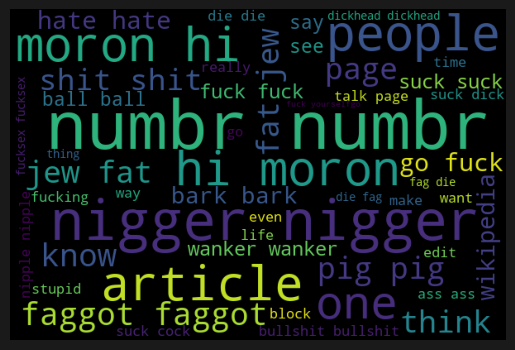

In [19]:
# toxic and severe_toxic comments-Word cloud
from wordcloud import WordCloud
hams = train['comment_text'][train['toxic']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

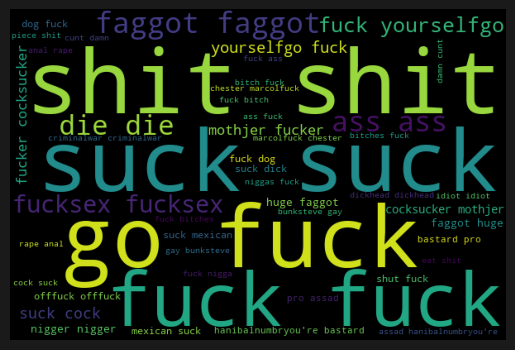

In [20]:
hams = train['comment_text'][train['severe_toxic']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [22]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features

In [23]:
print(train.shape)
print(test.shape)

(159571, 11)
(153164, 2)


In [24]:
y=train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,test_size=.20)

In [25]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)
LG.fit(x_train, y_train)
y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.960346556370245
Test accuracy is 0.9547234842550525
[[28512   183]
 [ 1262  1958]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28695
           1       0.91      0.61      0.73      3220

    accuracy                           0.95     31915
   macro avg       0.94      0.80      0.85     31915
weighted avg       0.95      0.95      0.95     31915



In [26]:
# xgboost
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))


Training accuracy is 0.9616625932192768
Test accuracy is 0.9531568228105907
[[28496   199]
 [ 1296  1924]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     28695
           1       0.91      0.60      0.72      3220

    accuracy                           0.95     31915
   macro avg       0.93      0.80      0.85     31915
weighted avg       0.95      0.95      0.95     31915



In [27]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))


Training accuracy is 0.9986761295982954
Test accuracy is 0.9545668181106063
[[28289   406]
 [ 1044  2176]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28695
           1       0.84      0.68      0.75      3220

    accuracy                           0.95     31915
   macro avg       0.90      0.83      0.86     31915
weighted avg       0.95      0.95      0.95     31915



In [28]:
# LGBM Classifier
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)
y_pred_train = lgbm.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = lgbm.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))


Training accuracy is 0.9609262392680329
Test accuracy is 0.9547234842550525
[[28468   227]
 [ 1218  2002]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28695
           1       0.90      0.62      0.73      3220

    accuracy                           0.95     31915
   macro avg       0.93      0.81      0.86     31915
weighted avg       0.95      0.95      0.95     31915



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2

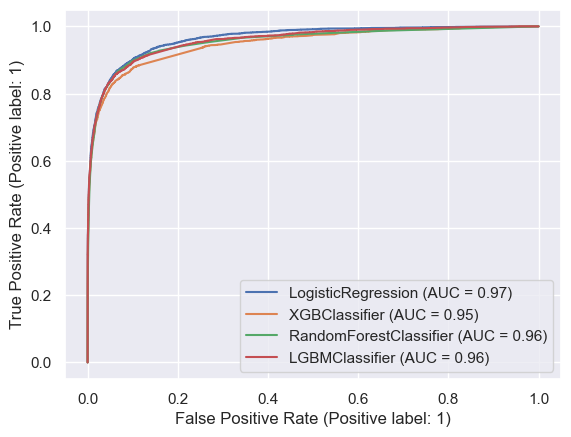

In [46]:
# Plotting the AUC-ROC curve larger area means better prediction
fig=metrics.plot_roc_curve(LG, x_test, y_test)
fig=metrics.plot_roc_curve(xgb, x_test, y_test,ax=fig.ax_)
fig=metrics.plot_roc_curve(RF, x_test, y_test,ax=fig.ax_)
fig=metrics.plot_roc_curve(lgbm, x_test, y_test,ax=fig.ax_)


In [47]:
# Making predictions on test data
test_data =tf_vec.fit_transform(test['comment_text'])
test_data
prediction=LG.predict(test_data) # using the Logistic regression model
prediction

array([0, 0, 0, ..., 0, 0, 0])